<a href="https://colab.research.google.com/github/woodRock/fishy-business/blob/main/code/identification/species/R01_S01_Identification_Species_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install skfeature-chappers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 1.0 MB/s eta 0:00:00


In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
import pickle

In [3]:
run = 1
seed = 1617 * run
np.random.seed(seed)

In [16]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.listdir('/content/drive/My Drive')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

path = ['drive', 'MyDrive', 'AI', 'fish', 'REIMS_data.xlsx']
path = os.path.join(*path)

# Load the dataset
data = pd.read_excel(path)

print("[INFO] Reading the dataset.")
raw = pd.read_excel(path)

data = raw[~raw['m/z'].str.contains('HM')]
data = data[~data['m/z'].str.contains('QC')]
data = data[~data['m/z'].str.contains('HM')]
X = data.drop('m/z', axis=1) # X contains only the features.
y = data['m/z'].apply(lambda x: 1 if 'H' in x else 0) # Binary encodinghs for class labels (1 for Hoki, 0 for Mackeral)
y = np.array(y)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[INFO] Reading the dataset.


In [6]:
inc = 50
no_features = X.shape[1] + inc
j = np.arange(inc,no_features,inc) # [50,4800]

In [7]:
from skfeature.function.similarity_based import reliefF
from skfeature.function.information_theoretical_based import MRMR
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import LinearSVC as svm

methods = { "reliefF" : reliefF.reliefF, "mrmr": MRMR.mrmr, "chi2": chi2}
results = { "reliefF" : [], "mrmr": [], "chi2": [], "pso": []}
penalty = 'l1'

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import balanced_accuracy_score

def normalize(X_train, X_test):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test

In [ ]:
# from Problem import FeatureSelection
# from PSO import Swarm

# def pso(X,y):
#     prob = FeatureSelection(minimized=True, X=X, y=y)
#     pop_size = 30
#     n_iterations = 100
#     no_fea = X.shape[1]
#     swarm = Swarm(n_particle=pop_size, length=no_fea, n_iterations=n_iterations,
#                         max_pos=1.0, min_pos=0.0, max_vel=0.2, min_vel=-0.2,
#                         problem=prob)
#     best_sol, best_fit = swarm.iterate()
#     sel_fea = np.where(best_sol > prob.threshold)[0]
#     return sel_fea

In [ ]:
# runs = 15
# name = "pso"
# folds = 10

# for k in tqdm(range(runs)):
#     train_accs = []
#     test_accs = []
#     skf = StratifiedKFold(n_splits=folds, random_state=1234, shuffle=True)

#     # DEBUG: Fold counter
#     f = 1

#     for train, test in skf.split(X, y):
#         X_train, X_test = (X[train], X[test])
#         y_train, y_test = y[train], y[test]
#         X_train, X_test = normalize(X_train, X_test)

#         sel_fea = pso(X_train, y_train)

#         # DEBUG: Measure progress.
#         print(f"Run {k}, fold {f} ")

#         model = svm(penalty='l1', dual=False, tol=1e-3, max_iter=5_000)
#         model.fit(X_train[:, sel_fea], y_train)

#         y_predict = model.predict(X_train[:, sel_fea])
#         train_acc = balanced_accuracy_score(y_train, y_predict)
#         train_accs.append(train_acc)

#         y_predict = model.predict(X_test[:, sel_fea])
#         test_acc = balanced_accuracy_score(y_test, y_predict)
#         test_accs.append(test_acc)

#         # DEBUG: Increment fold counter
#         f += 1

#     no_fea = len(sel_fea)
#     results[name].append((no_fea, np.mean(train_accs), np.mean(test_accs)))

  0%|          | 0/15 [00:00<?, ?it/s]

Run 0, fold 1 
Run 0, fold 2 
Run 0, fold 3 
Run 0, fold 4 
Run 0, fold 5 
Run 0, fold 6 
Run 0, fold 7 
Run 0, fold 8 
Run 0, fold 9 


  7%|▋         | 1/15 [1:01:29<14:20:58, 3689.87s/it]

Run 0, fold 10 
Run 1, fold 1 
Run 1, fold 2 
Run 1, fold 3 
Run 1, fold 4 
Run 1, fold 5 
Run 1, fold 6 
Run 1, fold 7 
Run 1, fold 8 
Run 1, fold 9 


 13%|█▎        | 2/15 [2:00:38<13:01:31, 3607.08s/it]

Run 1, fold 10 
Run 2, fold 1 
Run 2, fold 2 
Run 2, fold 3 
Run 2, fold 4 
Run 2, fold 5 
Run 2, fold 6 
Run 2, fold 7 
Run 2, fold 8 
Run 2, fold 9 


 20%|██        | 3/15 [3:00:39<12:00:51, 3604.28s/it]

Run 2, fold 10 
Run 3, fold 1 
Run 3, fold 2 
Run 3, fold 3 
Run 3, fold 4 
Run 3, fold 5 
Run 3, fold 6 
Run 3, fold 7 
Run 3, fold 8 
Run 3, fold 9 


 27%|██▋       | 4/15 [4:01:14<11:03:00, 3616.43s/it]

Run 3, fold 10 
Run 4, fold 1 
Run 4, fold 2 
Run 4, fold 3 
Run 4, fold 4 
Run 4, fold 5 
Run 4, fold 6 
Run 4, fold 7 
Run 4, fold 8 
Run 4, fold 9 


 33%|███▎      | 5/15 [5:01:18<10:01:58, 3611.83s/it]

Run 4, fold 10 
Run 5, fold 1 
Run 5, fold 2 
Run 5, fold 3 
Run 5, fold 4 
Run 5, fold 5 
Run 5, fold 6 
Run 5, fold 7 
Run 5, fold 8 
Run 5, fold 9 


 40%|████      | 6/15 [6:00:15<8:57:58, 3586.48s/it] 

Run 5, fold 10 
Run 6, fold 1 
Run 6, fold 2 
Run 6, fold 3 
Run 6, fold 4 
Run 6, fold 5 
Run 6, fold 6 
Run 6, fold 7 
Run 6, fold 8 
Run 6, fold 9 


 47%|████▋     | 7/15 [6:59:46<7:57:30, 3581.27s/it]

Run 6, fold 10 
Run 7, fold 1 
Run 7, fold 2 
Run 7, fold 3 
Run 7, fold 4 
Run 7, fold 5 
Run 7, fold 6 
Run 7, fold 7 
Run 7, fold 8 
Run 7, fold 9 


 53%|█████▎    | 8/15 [7:59:57<6:58:55, 3590.83s/it]

Run 7, fold 10 
Run 8, fold 1 
Run 8, fold 2 
Run 8, fold 3 
Run 8, fold 4 
Run 8, fold 5 
Run 8, fold 6 
Run 8, fold 7 
Run 8, fold 8 
Run 8, fold 9 


 60%|██████    | 9/15 [8:57:26<5:54:38, 3546.47s/it]

Run 8, fold 10 
Run 9, fold 1 
Run 9, fold 2 
Run 9, fold 3 
Run 9, fold 4 
Run 9, fold 5 
Run 9, fold 6 
Run 9, fold 7 
Run 9, fold 8 
Run 9, fold 9 


 67%|██████▋   | 10/15 [9:57:30<4:57:01, 3564.29s/it]

Run 9, fold 10 
Run 10, fold 1 
Run 10, fold 2 
Run 10, fold 3 
Run 10, fold 4 
Run 10, fold 5 
Run 10, fold 6 
Run 10, fold 7 
Run 10, fold 8 
Run 10, fold 9 


 73%|███████▎  | 11/15 [10:57:39<3:58:31, 3577.76s/it]

Run 10, fold 10 
Run 11, fold 1 
Run 11, fold 2 
Run 11, fold 3 
Run 11, fold 4 
Run 11, fold 5 
Run 11, fold 6 
Run 11, fold 7 
Run 11, fold 8 
Run 11, fold 9 


 80%|████████  | 12/15 [11:57:47<2:59:21, 3587.00s/it]

Run 11, fold 10 
Run 12, fold 1 
Run 12, fold 2 
Run 12, fold 3 
Run 12, fold 4 
Run 12, fold 5 
Run 12, fold 6 
Run 12, fold 7 
Run 12, fold 8 
Run 12, fold 9 


 87%|████████▋ | 13/15 [12:57:08<1:59:18, 3579.06s/it]

Run 12, fold 10 
Run 13, fold 1 
Run 13, fold 2 
Run 13, fold 3 
Run 13, fold 4 
Run 13, fold 5 
Run 13, fold 6 
Run 13, fold 7 
Run 13, fold 8 
Run 13, fold 9 


 93%|█████████▎| 14/15 [13:57:50<59:58, 3598.18s/it]  

Run 13, fold 10 
Run 14, fold 1 
Run 14, fold 2 
Run 14, fold 3 
Run 14, fold 4 
Run 14, fold 5 
Run 14, fold 6 
Run 14, fold 7 
Run 14, fold 8 
Run 14, fold 9 


100%|██████████| 15/15 [14:56:33<00:00, 3586.26s/it]

Run 14, fold 10 


In [ ]:
# with open('results-pso-cloud.pkl', 'wb+') as f:
#     pickle.dump(results, f)

In [22]:
X.iloc[[0,1]]

,77.037102,79.013678,80.011940,81.019698,81.089396,82.084366,83.068487,83.104423,85.083740,85.120276,...,471.121530,471.172537,472.113708,472.149422,472.173538,473.110334,473.141630,473.171294,474.114901,474.163176
0,44.151534,40.097125,103.332229,56.262516,24.328712,28.057736,26.838564,43.520341,77.593835,21.842768,...,143.038016,94.954617,202.746447,173.250273,106.053201,180.389768,69.019162,182.844367,192.338037,358.766952
1,30.469421,51.173076,22.743318,24.150739,27.172515,30.201250,22.662025,36.295514,55.892458,16.454817,...,217.143382,103.133625,223.958053,131.256351,111.457397,203.144074,45.392687,101.037729,191.553839,182.812799


In [23]:
folds = 10
y = y.ravel()

for k in tqdm(j):
    for name, fs_method in methods.items():
        if name == "pso":
          continue

        train_accs = []
        test_accs = []
        skf = StratifiedKFold(n_splits=folds, random_state=1234, shuffle=True)

        for train, test in skf.split(X, y):
            X_train, X_test = (X.iloc[train], X.iloc[test])
            y_train, y_test = y[train], y[test]
            X_train, X_test = normalize(X_train, X_test)

            fs = SelectKBest(fs_method, k=k)
            X_train = fs.fit_transform(X_train, y_train)
            X_test = fs.transform(X_test)

            model = svm(penalty='l1', dual=False, tol=1e-3, max_iter=5_000)
            clf = model.fit(X_train, y_train)

            y_predict = model.predict(X_train)
            train_acc = balanced_accuracy_score(y_train, y_predict)
            train_accs.append(train_acc)
            y_predict = model.predict(X_test)
            test_acc = balanced_accuracy_score(y_test, y_predict)
            test_accs.append(test_acc)

        no_fea = k
        results[name].append((no_fea, np.mean(train_accs), np.mean(test_accs)))

 95%|█████████▌| 20/21 [07:49<00:23, 23.47s/it]


ValueError: k should be <= n_features = 1023; got 1050. Use k='all' to return all features.

In [24]:
with open('results-full-cloud.pkl', 'wb+') as f:
    pickle.dump(results, f)

In [27]:
for name, result in results.items():
    if name == "pso":
        assert len(result) == 30, f"There are {len(result)} independent runs of PSO"
    else:
        assert len(result) == 96, f"There are {len(result)} results for {name}."

print(results)

AssertionError: There are 20 results for reliefF.

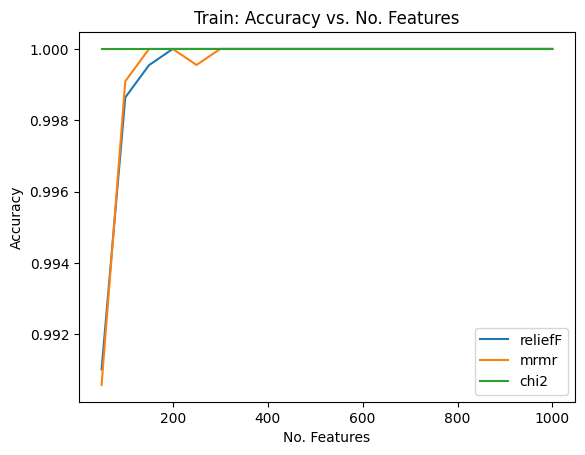

In [30]:
dataset="Species"

for name, result in results.items():
    if name == "pso":
        continue
    k, train, test = zip(*result)
    plt.plot(k, train, label=name)

plt.title("Train: Accuracy vs. No. Features")
plt.xlabel("No. Features")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(fname=f"accuracy-features-{dataset}-train", dpi=500)
plt.show()

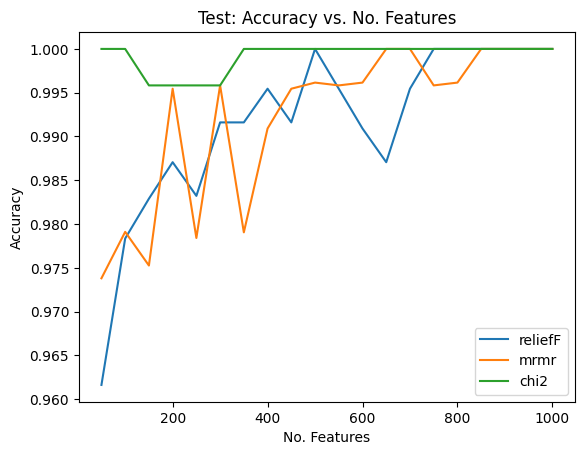

In [31]:
for name, result in results.items():
    if name == "pso":
        continue
    k, train, test = zip(*result)
    plt.plot(k, test, label=name)

plt.title("Test: Accuracy vs. No. Features")
plt.xlabel("No. Features")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig(fname=f"accuracy-features-{dataset}-test", dpi=500)
plt.show()

In [33]:
for method, result in results.items():
    if method == "pso":
        continue
    k, train, test = list(zip(*result))
    best_k = np.argmax(test)
    print(f"{method} performed best at {k[best_k]} features, with {train[best_k]} training accuracy, and {test[best_k]} test accuracy.")

k, train, test = results['mrmr'][-1]
print(f"Full-dataset with {k} features, with {train} training accuracy, and {test} test accuracy.")

reliefF performed best at 500 features, with 1.0 training accuracy, and 1.0 test accuracy.
mrmr performed best at 650 features, with 1.0 training accuracy, and 1.0 test accuracy.
chi2 performed best at 50 features, with 1.0 training accuracy, and 1.0 test accuracy.
Full-dataset with 1000 features, with 1.0 training accuracy, and 1.0 test accuracy.


In [36]:
from prettytable import PrettyTable

def show_results(results, label='Method'):
    table = PrettyTable([label, 'Best K', 'Train', 'Test'])

    for name, result in results.items():
        if name == "pso":
            continue
        k, train, test = list(zip(*result))
        best_k = np.argmax(test)
        vals = [k[best_k], train[best_k], test[best_k]]
        row = ['%.4f' % elem if i != 0 else elem for i, elem in enumerate(vals) ]
        table.add_row(np.concatenate([[name], row]))

    k, train, test = results['mrmr'][-1]
    vals = [k, train, test]
    row = ['%.4f' % elem if i != 0 else elem for i, elem in enumerate(vals) ]
    table.add_row(np.concatenate([['full'], row]))

    print('\n') # tqdm messses with table border.
    print(table)

show_results(results)



+---------+--------+--------+--------+
|  Method | Best K | Train  |  Test  |
+---------+--------+--------+--------+
| reliefF |  500   | 1.0000 | 1.0000 |
|   mrmr  |  650   | 1.0000 | 1.0000 |
|   chi2  |   50   | 1.0000 | 1.0000 |
|   full  |  1000  | 1.0000 | 1.0000 |
+---------+--------+--------+--------+
